In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys

sys.path.append('../')

from dynamic_sparse_reparameterization.DynamicSparseReparameterizationNet import DynamicSparseReparameterizationNet

/Users/emilhaugstvedt/mambaforge/envs/sparse/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = "Alu"

if dataset == "Alu":
    with open('../data/alu/train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('../data/alu/test.pickle', 'rb') as f:
        test_data = pickle.load(f)
        
if dataset == "Duffing":
    with open('../data/duffing/train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('../data/duffing/test.pickle', 'rb') as f:
        test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = DynamicSparseReparameterizationNet([13, 64, 64, 64, 8], H=0.001, sparsity=0.5, Np=100, fractional_tolerence=0.1, verbose=True)

In [5]:
model.get_number_of_nonzero_weights()

tensor(4768)

In [6]:
model.train_n_epochs(train_loader=train_loader, n_epochs=50, lr=0.01, weight_decay=0.001, epochs_reallocate=5)
model.train_n_epochs(train_loader=train_loader, n_epochs=50, lr=0.001, weight_decay=0.001, epochs_reallocate=150)

Epoch 0: 4.698143482208252
Sparsity: 0.5 

Pruned 8 weights
Adjusted H to 0.002
Grew 6 weights
Epoch 10: 1.440098524093628
Sparsity: 0.5002097189426422 

Pruned 11 weights
Adjusted H to 0.004
Grew 8 weights


KeyboardInterrupt: 

In [ ]:
y_pred = model(test_data.x).detach().numpy()

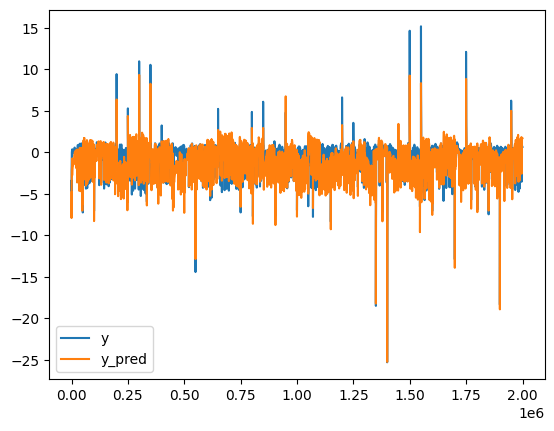

In [ ]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [ ]:
model.get_layerwise_sparsity()

[tensor(0.), tensor(0.3254), tensor(0.6658), tensor(0.0625)]

In [ ]:
model.get_sparsity()

0.4291107654571533

In [ ]:
layer = 3
torch.mul((model.layers[layer].weight.abs() < 0), (model.layers[layer].weight != 0)).count_nonzero()

tensor(0)

In [ ]:
layer = 4
(torch.where(((model.layers[layer].weight.abs() < 0.1) & (model.layers[layer].weight != torch.tensor(0))), 0, model.layers[layer].weight) - model.layers[layer].weight).sum()

IndexError: index 4 is out of range

In [ ]:
layer = 0
torch.nn.Parameter(torch.where(((model.layers[layer].weight.abs() < 0) & (model.layers[layer].weight != torch.tensor(0))), 0, model.layers[layer].weight))

Parameter containing:
tensor([[0.0000, 0.0000, 0.2687, 0.4586, 0.3419, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3504, 0.0000, 0.0000, 0.0000, 0.0000, 0.8363, 0.0000, 0.8122, 0.0000,
         0.0000, 0.0000, 0.1023, 0.0000, 0.0000, 0.0000, 0.7328, 0.8426, 0.0000,
         0.7026, 0.0967, 0.7599, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.6864, 0.2718, 0.6186, 0.5160, 0.5639, 0.6591, 0.1285, 0.0000,
         0.0000, 0.2822, 0.0000, 0.0000, 0.0000, 0.0000, 0.6796, 0.1521, 0.0000,
         0.1415, 0.0000, 0.0000, 0.6251, 0.0000, 0.0000, 0.8639, 0.4636, 0.1307,
         0.9527],
        [0.5694, 0.1875, 0.1470, 0.0000, 0.0000, 0.0000, 0.0286, 0.0000, 0.8333,
         0.0000, 0.7438, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9043, 0.9679,
         0.8834, 0.8501, 0.5715, 0.8038, 0.0000, 0.7425, 0.0000, 0.4020, 0.0000,
         0.2725, 0.0000, 0.0000, 0.2348, 0.0000, 0.0000, 0.5275, 0.4563, 0.4845,
         0.0000, 0.7754, 0.2306, 0.0000, 0.0000, 0.0000, 0.0000, 0.94

In [ ]:
layer = 0
torch.mul((model.layers[layer].weight.abs() < 0), (model.layers[layer].weight != 0)).count_nonzero()

tensor(0)